# COGS 108 - Final Project 

# Overview (10/3 pts)

*Fill in your overview here*

    In this data analysis report, we discuss what is the contributing factor that affect the inspection score  one restaurant will received. The hypothesis is that, the style of the restaurant and the geospatial location of the restaurants are the contributing factor to the inspection score. In the conclusion part, we will know that the hypothesis is merely correct. There are some kind of corralation between the score, and the type or location of the restaurant.

# Name & GitHub

- Name: Hsuan-Yu Lin
- GitHub Username: SeannLin

# Research Question (10/3 pts)

*Fill in your research question here*

    "Are the types, locations and cultures of the restaurant major contributing factors for restaurants that make them fail to receive grade A?"

## Background and Prior Work (10/3 pts)

*Fill in your background and prior work here* 

    Health inspectors look for both noncritical and critical violations. Some examples of critical violations criteria are proper food temperatures, adequate employee had washing stations, commercial dishwasher sanitation, the presence of vermin and employee hygiene, which may affect the likelihood of foodborne illness. If the score is between 90 to 100, then the restaurant will get grade A, 80-90 for grade B, and 70-80 for grade C. Different types of restaurants provide various styles of food. But the way that the food is prepared is also different. It has relationships between the culture and how the food is prepared, cooked, and then served for customers. The culture affects not only the habit of the people act but also the way that people prepare and cook food.

    There is a data analysis project on Kaggle called "I wouldn't eat at these places in SFO" [1] and answered similar question to the question that raised in this project, "will types and location of restaurants affect the health inspection grading?" According to the conclusion of that report, oriental restaurants in SF are the most likely to violate the health norms. The conclusion of that report is sensible, but the situation may be different between San Diego and San Francisco.

    Another project on Kaggle called "Extensive Modelling - ChicagoFoodInspections" [2] carries out a text mining and sentiment analysis based on the inspection text. The techniques used are similar to those I will use in this project. We could use the inspection text written by the inspector to explore if there are valuable findings that relate to the types of restaurants.

    References (include links):
- 1) https://www.kaggle.com/stansilas/i-wouldn-t-eat-at-these-places-in-sfo
- 2) https://www.kaggle.com/ambarish/extensive-modelling-chicagofoodinspections

# Hypothesis


    First, I believe the style of the restaurant will affect its sanity, which was shown by the data analysis result from reference [1]. You can see that the top ten restaurants at the high-risk level are mostly oriental restaurants.

    Second, as for the place, I believe there will be some relationship between the grading and the geological region of the restaurant. In wealthy communities, people will be affordable to eat at higher quality restaurants. On the contrary part, the sanity may not be highly maintained by the owner in a relatively not wealthy community.

# Dataset(s)  (10 pts)

- Dataset Name: 
    - inspection.csv
    - zip.csv
- Link to the dataset: (provided)
- Number of observations: 18466

    Comapring the variables in "inspection.csv" and "restaurant.csv," we found that restaurant.csv is almost the subset of "inspection.scv", which means that we rarely need to use the "restaurant.csv" file.

    At first, I would like to use several variables in the yelp.csv file that represent the style of the restaurant so that we can explore the relationship between inspection score and the style. But I later found that the restaurants in the inspection.csv and yelp.csv barely overlap, thus I think yelp.csv file is not useful in this analysis. (In the yelp.csv file, there are variables represent the food style of restaurants which are the variables of the interst. As a result, we would choose the columns "tradamerican", "mexican", "chinese", "italian", "newamerican", "sushi" that can stand for the style of the restaurant.)

In [49]:
# print(len(df_res.name.unique()), len(df_yelp.name.unique())) # check how many restaurants are inspected and how many restaurants are in the yelp dataset.
# df2 = pd.merge(df_res, df_yelp, on=["postalcode"])
# df2[df2.chinese == True]

# print(df_ins.name.str.contains("subway").any())
# print(df_yelp.name.str.contains("subway").any())

# Setup

In [1]:
## YOUR CODE HERE

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display plots directly in the notebook instead of in a new window
%matplotlib inline

# Configure libraries
# The seaborn library makes plots look nicer
sns.set()
sns.set_context('talk')

pd.set_option('display.max_column', 50)
# plt.rcParams['figure.figsize'] = (17, 7)

import warnings
warnings.filterwarnings('ignore')

import patsy
import statsmodels.api as sm

In [2]:
df_ins = pd.read_csv("inspections.csv", dtype={"zip":str})
# df_res = pd.read_csv("restaurants.csv")
# df_vio = pd.read_csv("violations.csv")
# df_yelp = pd.read_csv("yelp.csv")
df_zip = pd.read_csv("zipcodes.csv", dtype={"zip":str})

In [3]:
# for label in df_ins.columns:
#     if type(label) == str:
#         print(label)
#         print(df_ins.loc[:,label].unique())

In [4]:
df = df_ins[["name", "x", "y", "score", "zip"]] # collect all the data we want into a dataframe
df

,name,x,y,score,zip
0,Cafe 3000 At Wake Med,-78.587963,35.783914,96.0,27610
1,Overtime Sports Pub,-78.549673,35.791986,98.0,27610
2,TASTE OF CHINA,-78.547960,35.723125,97.0,27610
3,Panera Bread #1643,-78.815727,35.799249,99.0,27513
4,WalMart Supercenter #4499-00 Deli/Bakery,-78.296347,35.831285,97.0,27597
...,...,...,...,...,...
18461,Sino Wok,-78.571592,35.865463,93.0,27616
18462,Weatherstone Elem. Sch. Cafeteria,-78.810141,35.792444,97.0,27513
18463,ALSTON RIDGE ELEMENTARY SCHOOL CAFETERIA,-78.899581,35.859131,96.0,27519
18464,Food Lion #996 Meat Market,-78.697343,35.665198,99.0,27603


# Data Cleaning (10 pts)

In [5]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

data cleaning

    After selecting the variables we want from the five csv files and combining them together into a single dataframe that easier for data analysis, we now check if the data is clean or not. First, we check if there are any missing values in the dataframe.

In [6]:
df.isna().any().any()

False

In [7]:
df_zip.isna().any().any()

False

    And next, we take a brief look over the data on the score distribution using histogram. The result shows that all the value are within reasonable range (not below 0 or above 100), and no outliers showed in the data set (particularly low that far away from the majority). As a result, the score data is clean enough now.

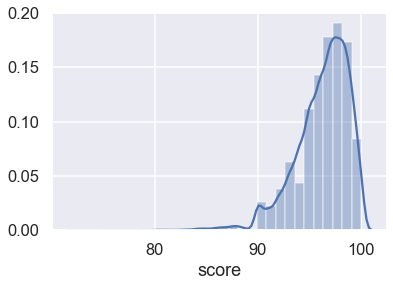

In [8]:
sns.distplot(df_ins.score, hist=True, bins=30) # the health inspection score distribution

    After seeing a distribution of the inspections, then change the quantitative score into categorical grade.

In [9]:
def inspect_grade(score):
    if score >= 90:
        grade = "A"
    elif score >= 80:
        grade = "B"
    else:
        grade = "C"
    return grade

In [10]:
series_grade = df["score"].apply(inspect_grade)
df["grade"] = series_grade
df.head()

,name,x,y,score,zip,grade
0,Cafe 3000 At Wake Med,-78.587963,35.783914,96.0,27610,A
1,Overtime Sports Pub,-78.549673,35.791986,98.0,27610,A
2,TASTE OF CHINA,-78.547960,35.723125,97.0,27610,A
3,Panera Bread #1643,-78.815727,35.799249,99.0,27513,A
4,WalMart Supercenter #4499-00 Deli/Bakery,-78.296347,35.831285,97.0,27597,A


    We separate the dataframe into subsets using the grade variable.

In [12]:
df_A = df[df["grade"] == "A"]
df_B = df[df["grade"] == "B"].drop(['x','y'], axis=1)
df_C = df[df["grade"] == "C"].drop(['x','y'], axis=1)

In [13]:
df_BC = df[(df["grade"] == "B") | (df["grade"] == "C")]
df_BC.head()

,name,x,y,score,zip,grade
567,WAFFLE HOUSE #1302,-78.837896,35.711426,89.0,27539,B
1205,PARADISE INDIA CUISINE,-78.827880,35.830126,85.0,27560,B
1527,Wang`s Kitchen,-78.579237,35.798853,84.0,27610,B
1654,BACK 9 PUB,-78.827064,35.790861,87.5,27513,B
1803,Jumbo China #5,-78.618741,35.866279,87.0,27609,B


# Data Analysis & Results (25 pts + 15 pts for vis)

Include cells that describe the steps in your data analysis.

In [14]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

    Take a look of the data based on quantative variable, grade. And we now know that most restaurants received grade A. However, there are totally 285 restaurants failed to receive grade A. Among them, there are 276 restaurants received grade B and 9 restaurants received grade C.

In [15]:
df.grade.value_counts()

A    18181
B      276
C        9
Name: grade, dtype: int64

    An interesting finding here is that, among the nine restaurants receiving grade C, we can know that there are five restaurants are asian style by their names. (And in fact AROMA is another Korean restaurant.)

In [16]:
df_C

,name,score,zip,grade
4372,Chinatown Express,77.5,27612,C
6598,Jumbo China #5,75.0,27609,C
6860,WANG`S KITCHEN,78.5,27604,C
8253,SAWASDEE THAI RESTAURANT,78.5,27612,C
10703,AROMA,78.5,27513,C
11625,LOS TRES MAGUEYES,75.0,27610,C
16721,SPICE &amp; CURRY,76.0,27560,C
17535,HONG KONG CHINESE KITCHEN,79.0,27606,C
18307,S-MART CAFE,72.5,27511,C


    Now, we take look at the geospatial distribution of the data based on there longitudinal and latitudinal coordinates to see if there is any finding. The most intereting thing we can have here is that two restaurant received garde C are close to each other at around longtidue -78.7.

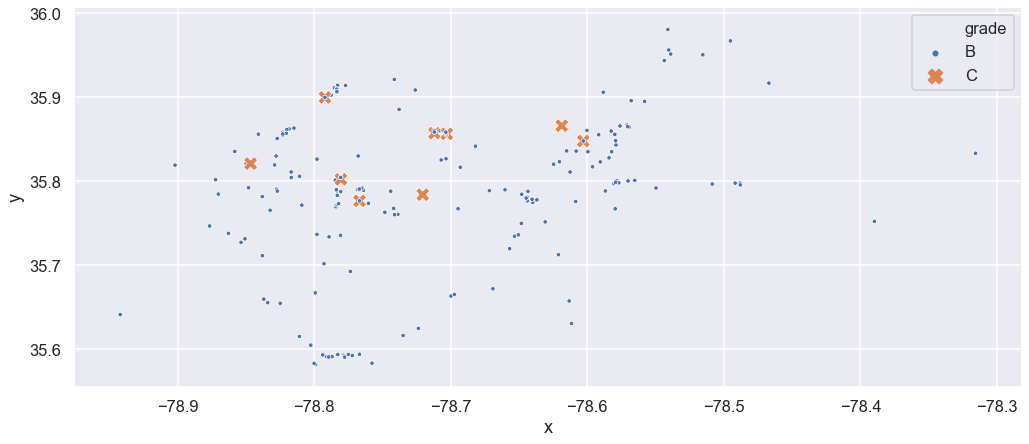

In [24]:
plt.figure(figsize=(17,7))
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x="x", y="y",
                     hue="grade", size="grade", style="grade",
                     sizes=(200, 20), hue_norm=(0, 7),
                     legend="full", data=df_BC)

    Now we see the distribution of restaurants that including grade A restaurants. From the plot below, we can know that from the aspect of the geospatial location, there are no specific patterns that restaurants with lower scores will fall in specific cluster since they are scattered in different regions.

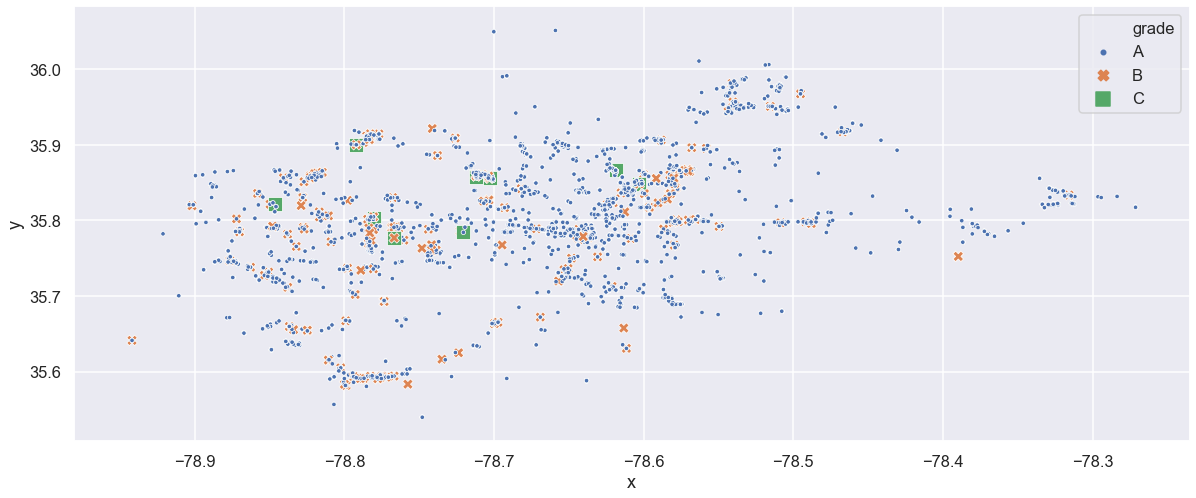

In [32]:
plt.figure(figsize=(20,8))
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x="x", y="y",
                     hue="grade", size="grade", style="grade",
                     sizes=(200, 20), hue_norm=(0, 7),
                     legend="full", data=df)


In [34]:
# df_zip2 = df_zip[["zip", "median_family_income_dollars"]]
# df_zip2["income_diff"] = df_zip["median_family_income_dollars"].apply(lambda x: x - min(df_zip["median_family_income_dollars"]))
# df_zip2.head()

In [35]:
# df["score_diff"] = df["score"].apply(lambda x: x - 72.5) # min(df["score"]) is 72.5
# df.head()

    Now, we select variables of interest in the zip.csv

In [37]:
df_zip = df_zip[["zip", "median_family_income_dollars", "percent_nonwhite"]]
df_zip

,zip,median_family_income_dollars,percent_nonwhite
0,27501,59408,17.9
1,27502,109891,18.9
2,27511,82292,24.8
3,27513,109736,27.8
4,27518,125432,19.9
5,27519,137193,35.2
6,27520,67939,23.5
7,27522,66250,31.4
8,27523,89184,22.4
9,27526,74666,22.5


    We want to see that grade C restaurants locate in what specific regions. So we merge it with the df_C and df_BC by the zip code variable "zip". After merging, the total number of observations will be 38 which is the number of rows that zip.csv file provided. 

In [71]:
df_2 = pd.merge(df_C, df_zip, how='outer', on=['zip'])
df_2

,name,score,zip,grade,median_family_income_dollars,percent_nonwhite
0,Chinatown Express,77.5,27612,C,98452,23.2
1,SAWASDEE THAI RESTAURANT,78.5,27612,C,98452,23.2
2,Jumbo China #5,75.0,27609,C,73715,27.2
3,WANG`S KITCHEN,78.5,27604,C,57419,41.3
4,AROMA,78.5,27513,C,109736,27.8
5,LOS TRES MAGUEYES,75.0,27610,C,49213,72.7
6,SPICE &amp; CURRY,76.0,27560,C,97917,53.3
7,HONG KONG CHINESE KITCHEN,79.0,27606,C,61324,31.8
8,S-MART CAFE,72.5,27511,C,82292,24.8
9,NaN,NaN,27501,NaN,59408,17.9


    If we want to look at the relationship between those grade C restaurants and the "median_family_income_dollars" of the region (merge by zip code). The result shows no obvious relationship, because those grade C restaurants locate in both regions with low median income and regions with relative higher median income.

In [72]:
df_2.sort_values(by='median_family_income_dollars', ascending=False)

,name,score,zip,grade,median_family_income_dollars,percent_nonwhite
12,NaN,NaN,27519,NaN,137193,35.2
11,NaN,NaN,27518,NaN,125432,19.9
32,NaN,NaN,27608,NaN,125019,8.7
34,NaN,NaN,27614,NaN,119232,16.6
10,NaN,NaN,27502,NaN,109891,18.9
30,NaN,NaN,27605,NaN,109886,14.8
4,AROMA,78.5,27513,C,109736,27.8
33,NaN,NaN,27613,NaN,106854,22.6
35,NaN,NaN,27615,NaN,98884,19.6
37,NaN,NaN,27617,NaN,98642,30.4


    But if we change the variable "median_family_income_dollars" with "percent_nonwhite", then we can see an interesting result. The grade C restaurants mainly locate in the region where non-white percentage of the population is higher. The result tells us restaurant with grade C tends to running in region with fewer 

In [73]:
df_2.sort_values(by='percent_nonwhite', ascending=False)

,name,score,zip,grade,median_family_income_dollars,percent_nonwhite
5,LOS TRES MAGUEYES,75.0,27610,C,49213,72.7
28,NaN,NaN,27601,NaN,28641,69.9
38,NaN,NaN,27703,NaN,60783,61.5
6,SPICE &amp; CURRY,76.0,27560,C,97917,53.3
36,NaN,NaN,27616,NaN,60033,52.6
20,NaN,NaN,27545,NaN,72301,44.4
3,WANG`S KITCHEN,78.5,27604,C,57419,41.3
12,NaN,NaN,27519,NaN,137193,35.2
17,NaN,NaN,27529,NaN,68627,33.9
24,NaN,NaN,27591,NaN,59892,32.8


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1b41d0d0>,
      dtype=object)

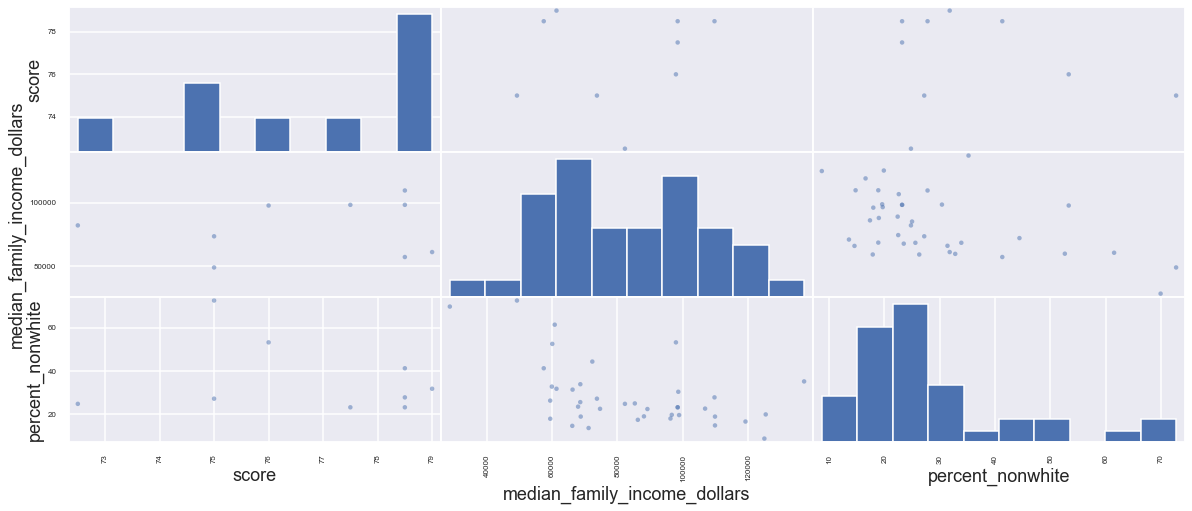

In [74]:
pd.plotting.scatter_matrix(df_2, figsize = (20, 8))

    We use the technique of oridinary-least square to see whether median income of the region affects the inspection score or not.

In [91]:
outcome, predictors = patsy.dmatrices('score ~ median_family_income_dollars', df_2) # Patsy gives us an easy way to construct design matrices. For our purpose, 'design matrices' are just organized matrices of our predictor and output variables
mod = sm.OLS(outcome, predictors) # Now use statsmodels to intialize an OLS linear model. This step initializes the model, and provides the data (but does not actually compute the model)
res = mod.fit() # Finally, fit the model
print(res.summary()) # Check out the results

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                 -0.116
Method:                 Least Squares   F-statistic:                    0.1666
Date:                Wed, 10 Jun 2020   Prob (F-statistic):              0.695
Time:                        23:36:04   Log-Likelihood:                -19.327
No. Observations:                   9   AIC:                             42.65
Df Residuals:                       7   BIC:                             43.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [92]:
min(df_2.median_family_income_dollars)

28641

In [82]:
df_3 = df_2.rename({"median_family_income_dollars": "median_diff"}, axis='columns')
# df_3["median_diff"] = df_2.median_family_income_dollars.apply(lambda x: x - 28641)
df_3["median_diff"] = df_2.median_family_income_dollars.apply(lambda x: np.log10(x))
df_3

,name,score,zip,grade,median_diff,percent_nonwhite
0,Chinatown Express,77.5,27612,C,4.993225,23.2
1,SAWASDEE THAI RESTAURANT,78.5,27612,C,4.993225,23.2
2,Jumbo China #5,75.0,27609,C,4.867556,27.2
3,WANG`S KITCHEN,78.5,27604,C,4.759056,41.3
4,AROMA,78.5,27513,C,5.040349,27.8
5,LOS TRES MAGUEYES,75.0,27610,C,4.692080,72.7
6,SPICE &amp; CURRY,76.0,27560,C,4.990858,53.3
7,HONG KONG CHINESE KITCHEN,79.0,27606,C,4.787630,31.8
8,S-MART CAFE,72.5,27511,C,4.915358,24.8
9,NaN,NaN,27501,NaN,4.773845,17.9


In [84]:
outcome_1, predictors_1 = patsy.dmatrices('score ~ median_diff', df_3) # Patsy gives us an easy way to construct design matrices. For our purpose, 'design matrices' are just organized matrices of our predictor and output variables
mod_1 = sm.OLS(outcome_1, predictors_1) # Now use statsmodels to intialize an OLS linear model. This step initializes the model, and provides the data (but does not actually compute the model)
res_1 = mod_1.fit() # Finally, fit the model
print(res_1.summary()) # Check out the results

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.126
Method:                 Least Squares   F-statistic:                    0.1032
Date:                Wed, 10 Jun 2020   Prob (F-statistic):              0.757
Time:                        22:39:19   Log-Likelihood:                -19.367
No. Observations:                   9   AIC:                             42.73
Df Residuals:                       7   BIC:                             43.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      66.0989     33.077      1.998      

    We use the technique of oridinary-least square to see whether nonwhite population percentage of the region affects the inspection score or not.

In [89]:
outcome_2, predictors_2 = patsy.dmatrices('score ~ percent_nonwhite', df_3) # Patsy gives us an easy way to construct design matrices. For our purpose, 'design matrices' are just organized matrices of our predictor and output variables
mod_2 = sm.OLS(outcome_2, predictors_2) # Now use statsmodels to intialize an OLS linear model. This step initializes the model, and provides the data (but does not actually compute the model)
res_2 = mod_2.fit() # Finally, fit the model
print(res_2.summary()) # Check out the results

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                 -0.096
Method:                 Least Squares   F-statistic:                    0.2968
Date:                Wed, 10 Jun 2020   Prob (F-statistic):              0.603
Time:                        22:40:40   Log-Likelihood:                -19.246
No. Observations:                   9   AIC:                             42.49
Df Residuals:                       7   BIC:                             42.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           77.6803      1.922  

    The two OLS reports above shows that

# Ethics & Privacy (15 pts)

*Fill in your ethics & privacy discussion here*

    According to the Safe Harbor privacy principle, we shouldn't reveal the following information in the data analysis report:
* Names
* Geographic Subdivisions smaller than a state**
* Dates (such as birth dates, etc), and all ages above 90
* Telephone Numbers
* Vehicle Identification Numbers
* Fax numbers
* Device identifiers and serial numbers
* Email addresses
* Web Universal Resource Locators (URLs)
* Social security numbers
* Internet Protocol (IP) addresses
* Medical record numbers
* Biometric identifiers, including finger and voice prints
* Health plan beneficiary numbers
* Full-face photographs and any comparable images
* Account numbers
* Certificate/license numbers
* Any other unique identifying number, characteristic, or code

    variables such as names and telephone numbers are provided among the five datasets. As a result, we should use the variable "hsisid" to replace variable "name". But since we cannnot judge the style of the restaurants if we don't use the name, as a result the name is used. The style of the restaurants were provided in the yelp.csv file, however, those restaurant in the yelp.csv file didn't match the restaurants in the inspections.csv file.

# Conclusion & Discussion (15 pts)

    The conclusion of this analysis report can answer the question "Are the types, locations and cultures of the restaurant major contributing factors for restaurants that make them fail to receive grade A?" 
    
    During the process of this analysis, we found that over half of the restaurants receiving grade C are oriental restaurants (6 out of 9). And among the six, four are chinese restaurant, one is Thai restaurant and the other is Korean restaurant. Futher investigation on the grade B restaurants can be made as well if the restaurants in yelp dataset match those restaurants in the inspection dataset. We could do this by running codes, rather than via visual inspection after data wrangling.
    
    On the other hand, we also found that grade C restaurants have a correlation with the location. The regions with higher nonwhite percentage tends to have more grade C restaurants. One reasonable explanation here is that oriental restaurant will locate in regions where asians are more, plus the oriental restaurants are tend to receive lower grade. As a result, there is a correlation between the inspection score and the nonwhite percentatge within the region. 
    
    As for the median income within different disctricts, this variable have merely no correlation with the inspection score. This is not the same as the random guess that I previously believed. The truth is, in relatively wealthy communities, the quality of the restaurants may still failed to be mainted and thus got a low inspection score. 